# Preliminary Analysis

### Data Cleaning Code
Code for cleaning and processing your data. Include a data dictionary for your transformed dataset.

<!--These are previous data dictionaries that were created, but now the data dictionary above is the combined one  -->
<!-- - Data Dictionary for Air Quality -->
<!--     - **indicator id:** id for each name -->
<!--     - **name:** classify the sample in the air -->
<!--     - **measure:** how the indicator is measured -->
<!--     - **measure info:** information about the measure -->
<!--     - **geo type name:** geography type, UHF stands for United Hospital Fund neighborhoods -->
<!--     - **geo place name:** neighborhood name -->
<!--     - **time period:** time frame -->
<!--     - **start_date:** date started -->
<!--     <br><br> -->
<!-- - Data Dictionary for Traffic Volume -->
<!--     - **requestId:** unique id generated for each counts request -->
<!--     - **boro:** lists which of the five diviions of New York City the location is within -->
<!--     - **vol:** total sum of count collected within 15 minute increments -->
<!--     - **segmentId:** The ID that idenifies each segment of a street -->
<!--     - **wktgeom:** Geometry point of the location -->
<!--     - **street:** street name of where traffic happened -->
<!--     - **fromst:** start street of traffic -->
<!--     - **tost:** end street where traffic volume was located -->
<!--     - **direction:** text-based direction of traffic where the count took place -->
<!--     - **date_time:** date at which it took place -->
<!--     <br><br> -->
<!-- - Data Dictionary for 2020 mobility Dataset -->
<!--     - **sub_region_2** which county it is -->
<!--     - **date** date during recording -->
<!--     - **retail_and_recreation_percent_change_from_baseline** mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters. -->
<!--     - **grocery_and_pharmacy_percent_change_from_baseline** mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies -->
<!--     - **parks_percent_change_from_baseline** mobility trends for places like national parks, public beaches, marinas, dog parks, plazas, and public gardens -->
<!--     - **transit_stations_percent_change_from_baseline** mobility trends for places like public transport hubs such as subway, bus, and train stations -->
<!--     - **workplaces_percent_change_from_baseline** mobility trend for places of work -->
<!--     - **residential_percent_change_from_baseline** mobility trends for places of residence -->

#### Data Dictionary for traffic_vol_aqi 
- boro: specific borough in nyc
- date: the date in which the datasets align
- vol: traffic volume
- arithmetic_mean: mean of data
- aqi: air quality index 
    
### Exploratory Analysis
Describe what work you have done so far and include the code. This may include descriptive statistics, graphs and charts, and preliminary models.

- We removed some columns that were irrelevant to what we want to predict as well as combine some columns that would fit together, such as the date and time.


### Challenges
Describe any challenges you've encountered so far. Let me know if there's anything you need help with!

- There were some challenges in figuring out what sort of data was necessary to include for our problem as it was targeted in New York City. 
- Figuring out the transformations to use on each dataset was also a challenge since there were many columns for each dataset and we had to find the ones that weren't relevant to our problem.
- There are some issues for the columns right now where there are some, such as segmentId in the Traffic Volume dataset where we are currently unsure if it's useful to keep or remove.
- Dealing with large datasets efficiently

### Future Work
Describe what work you are planning to complete for the final analysis.

- Future work includes using the cleaned data to use as inputs for models suited for classification such as Linear Regression. 
- Make predictions using the models trained to obtain the accuracy scores to answer our questions
- Find the best model for accuracy as well as graph/chart the data to further understand it for future predictions.

### Contributions
Describe the contributions that each group member made.
- **Daniel Aguilar-Rodriguez**
    - Researched and acquired datasets
    - Helped present ideas during brainstorming session
    - Created jupyter notebook and helped clean datasets
    - Helped transform datasets and removed columns irrelevant to our work
    <br><br>
- **Jia Cong Lin**
    - Helped present ideas during brainstorming session
    - Helped define necessary columns for the mobility dataset
    - Assisted in determining columns to clean and define 
    <br><br>
- **Anvinh Truong**
    - Helped clean and define some columns for the datasets and dictionary
    - Helped present ideas during brainstorming session
    - Assisted in thinking of procedure to clean data columns

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import datetime
import json
import re
import time 

In [2]:
def fetch_data(csv_name):
    url_dict = {'air_quality': 'https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.csv', 
                'mobility_global': 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', 
                'traffic_volume': 'https://data.cityofnewyork.us/api/views/7ym2-wayt/rows.csv'}
    
    if csv_name == 'daily_air_quality':
        create_air_quality_csv()
    else:
        response = requests.get(url_dict[csv_name])
        path = f'datasets/{csv_name}.csv'
        with open(path, 'wb') as f:
            f.write(response.content)

In [3]:
def csv_exists(csv_name):
    path = f'datasets/{csv_name}.csv'
    file_exists = os.path.exists(path)
    return file_exists

In [4]:
def create_df(csv_name):
    if not csv_exists(csv_name):
        fetch_data(csv_name)
    path = f'datasets/{csv_name}.csv'
    df = pd.read_csv(path)
    return df

In [5]:
def mkdir_if_not_exist():
    directory = 'datasets'
    if not os.path.exists(f'{directory}/'):
        os.mkdir(directory)

In [6]:
def create_all_df(csv_names):
    mkdir_if_not_exist()
    df_list = []
    
    for csv_name in csv_names:
        print(f'Creating {csv_name} df')
        df = create_df(csv_name)
        df_list.append(df)
        
    return df_list

In [7]:
def get_json(url):
    response = requests.get(url)
    j = json.loads(response.text)
    
    return j

In [8]:
def get_code(target_value, url):
    code = ''
    j = get_json(url)
    
    for entry in j['Data']:
        if entry['value_represented'] == target_value:
            code = entry['code']
            
    return code

In [9]:
def get_state_code(state_name):
    url = 'https://aqs.epa.gov/data/api/list/states?email=test@aqs.api&key=test'
    state_code = get_code(state_name, url)

    return state_code

In [10]:
def get_county_code(state_code, county_name):
    url = f'https://aqs.epa.gov/data/api/list/countiesByState?email=test@aqs.api&key=test&state={state_code}'
    county_code = get_code(county_name, url)
    
    return county_code

In [11]:
'''def get_county_code_list(county_names):
    county_codes = []
    for county in county_names:
        county_codes.append()'''

def get_county_code_list(state_code):
    url = f'https://aqs.epa.gov/data/api/list/countiesByState?email=test@aqs.api&key=test&state={state_code}'

    j = get_json(url)
    county_codes = []
    
    for county in j['Data']:
        if re.fullmatch('Bronx|Kings|New York|Queens|Richmond', county['value_represented']):
            county_codes.append(county['code'])  
    
    return county_codes

In [12]:

#start_date = str(traffic_vol_daily['date'].min()).replace('-', '')
#end_date = str(traffic_vol_daily['date'].max()).replace('-', '')
#start_date = '20160101'
#end_date = '20160229'
#county_code = '005'

def get_daily_air_quality_list(state_code, county_codes):
    email = 'daguila000@citymail.cuny.edu'
    key = 'cobaltcrane81'
    param_code = '88101'
    daily_air_quality_list = []

    #year_counter = traffic_vol_daily['date'].min().year
    #end_year = traffic_vol_daily['date'].max().year
    year_counter = 2009
    end_year = 2020

    while year_counter <= end_year:
        for county_code in county_codes: 
            start_date = str(year_counter) + '0101'
            end_date = str(year_counter) + '1231'
            url = f'https://aqs.epa.gov/data/api/dailyData/byCounty?email={email}&key={key}&param={param_code}&bdate={start_date}&edate={end_date}&state={state_code}&county={county_code}'
            j = get_json(url)
            print(j['Header'])
            daily_air_quality_list.extend(j['Data'])
            time.sleep(6)
        year_counter += 1
        
    return daily_air_quality_list


In [13]:
'''state = 'New York'
state_code = get_state_code(state)
print(state_code)
print(get_county_code_list(state_code))'''

"state = 'New York'\nstate_code = get_state_code(state)\nprint(state_code)\nprint(get_county_code_list(state_code))"

In [14]:
def create_air_quality_csv():
    state = 'New York'
    state_code = get_state_code(state)
    county_code_list = get_county_code_list(state_code)
    daily_air_quality_list = get_daily_air_quality_list(state_code, county_code_list)
    daily_air_quality_df = pd.DataFrame(daily_air_quality_list)
    daily_air_quality_df.to_csv('datasets/daily_air_quality.csv')

In [15]:
csv_names = ['traffic_volume', 'daily_air_quality']

traffic_volume, daily_air_quality = create_all_df(csv_names)

Creating traffic_volume df
Creating daily_air_quality df


C:\Users\Jia Cong Lin\AppData\Local\Temp\ipykernel_3868\473898993.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


## Air Quality Dataset Cleaning

print(air_quality.isnull().sum() / len(air_quality))
air_quality = air_quality.drop(['Message'], axis=1)
print(air_quality.isnull().sum() / len(air_quality))
print(air_quality.nunique() / len(air_quality))
air_quality = air_quality.drop(['Unique ID'], axis=1)
print(air_quality.shape)
print(air_quality.nunique() / len(air_quality))
air_quality = air_quality.drop(['Geo Join ID'], axis=1)
print(air_quality.shape)
print(air_quality.nunique() / len(air_quality))
air_quality.dtypes
air_quality.nunique()
air_quality['Time Period'].unique()
np.sort(air_quality['Time Period'].unique())
air_quality['Time Period'].value_counts() / len(air_quality)
air_quality['Start_Date'].unique()
air_quality['Start_Date'] = pd.to_datetime(air_quality['Start_Date'], infer_datetime_format=True)
air_quality['Start_Date'].min()
air_quality['Start_Date'].value_counts().sort_index() / len(air_quality)
air_quality.groupby('Start_Date')['Time Period'].value_counts()
list(air_quality[air_quality['Time Period'].str.contains('Winter')]['Time Period'].unique())
air_quality[air_quality['Time Period'].str.contains('Winter|Summer')].groupby('Time Period')['Start_Date'].value_counts()
air_quality[air_quality['Time Period'].str.contains('Winter')]
air_quality.sample(10)
air_quality[air_quality['Geo Type Name'].str.contains('Borough')]['Time Period'].unique()
air_quality[air_quality['Geo Type Name'].str.contains('Borough')].groupby('Name')['Geo Place Name'].value_counts()
list(air_quality['Name'].unique())
air_quality.groupby(['Name', 'Start_Date'])['Time Period'].value_counts()
air_quality['Geo Type Name'].unique()
air_quality[air_quality['Geo Type Name'].str.contains('CD')]
air_quality[air_quality['Geo Type Name'].str.contains('UHF42')]
air_quality[air_quality['Geo Type Name'].str.contains('UHF34')]
air_quality_boros = air_quality[air_quality['Geo Type Name'].str.contains('Borough')]
air_quality_boros = air_quality_boros.drop(['Geo Type Name'], axis=1)
air_quality_boros.sample(10)
for time_period in air_quality_boros['Time Period'].sort_values().unique():
    print(time_period, 'length:', len(time_period))
air_quality.groupby('Time Period')['Start_Date'].value_counts()
def create_end_dates(air_quality_boros_dict):
    end_dates = []
    for row in air_quality_boros_dict:
        time_period_str_len = len(row['Time Period'])
        year = row['Start_Date'].year
        if time_period_str_len == 4:
            date = datetime.date(year, 12, 31)
        elif time_period_str_len == 9:
            date = datetime.date(year + 2, 12, 31)
        elif time_period_str_len == 11:
            date = datetime.date(year, 8, 31)
        elif time_period_str_len == 14:
            date = datetime.date(year + 1, 2, 28)
        elif time_period_str_len == 19:
            year = int(row['Time Period'][-4:])
            date = datetime.date(year, 12, 31)
        end_dates.append(date)
    return end_dates
air_quality_boros['end_date'] = create_end_dates(air_quality_boros.to_dict('records'))
air_quality_boros.sample(10)
air_quality_boros['Indicator ID'].nunique()
print(air_quality.groupby(['Name', 'Measure'])['Indicator ID'].value_counts())
print(len(air_quality.groupby(['Name', 'Measure'])['Indicator ID'].value_counts()))
air_quality_boros = air_quality_boros.drop(['Indicator ID'], axis=1)
air_quality_boros.sample(10)
air_quality_boros.groupby(['Name'])['Measure'].value_counts()
air_quality_boros[air_quality_boros['Time Period'].str.contains("Annual")]['Measure'].unique()
air_quality_boros[air_quality_boros['Time Period'].str.contains("Annual")]['Name'].unique()
air_quality_boros[air_quality_boros['Measure'].str.contains("Mean")]['Time Period'].unique()

## Traffic Volume Dataset Cleaning

In [16]:
traffic_volume.sample(10)

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
7186881,7471,Bronx,2008,5,8,19,0,808,134798,POINT (1016148.8 239076.1),W/B EASTERN BLVD BRIDGE@BRONX RIVER AVE,BRUCKNER EXWY,BODY OF WATER,WB
471531,30520,Manhattan,2019,6,13,9,45,0,32851,POINT (988021.775762573 200081.79986567018),GRAND STREET,Attorney Street,Clinton Street,WB
26879864,11564,Brooklyn,2012,10,16,22,30,26,18641,POINT (983502.7 158624.2),BATH AV,BAY 22 ST,BAY 23 ST,WB
9635945,2716,Bronx,2010,3,24,20,15,47,89038,POINT (1022311.4 266638.8),S/B WEBSTER AVE @ E 236 ST (CITY LINE),E 235 ST,E 236 ST,SB
21911835,27183,Queens,2017,6,11,17,15,1,244589,POINT (1026154.5759305783 215269.2778982867),BOAT BASIN PLACE,Shea Road,Shea Road,EB
24484867,18476,Brooklyn,2014,11,14,8,45,4,108118,POINT (1004054.3088330377 167384.5205624712),EAST 49 STREET,Avenue J,Avenue K,SB
101144,15917,Queens,2013,10,31,7,0,92,64588,POINT (1052394.4 194445.3),MURDOCK AV,200 ST,201 ST,WB
16486578,21150,Brooklyn,2016,3,10,20,15,141,41162,POINT (1004238.3 168569),UTICA AV,AV J,AV I,SB
26507851,16599,Bronx,2014,4,1,16,15,121,99719,POINT (1041283 251358.8),CITY ISLAND BR,CENSUS BOUNDARY,CITY ISLAND AV,WB
6400819,16547,Manhattan,2014,2,14,11,45,0,34338,POINT (987872.8 220304.7),AMSTERDAM AV,W 60 ST,W 61 ST,NB


In [17]:
traffic_volume.shape

(27190511, 14)

In [18]:
print(traffic_volume.isnull().sum() / len(traffic_volume))

RequestID    0.000000
Boro         0.000000
Yr           0.000000
M            0.000000
D            0.000000
HH           0.000000
MM           0.000000
Vol          0.000000
SegmentID    0.000000
WktGeom      0.000000
street       0.000000
fromSt       0.000000
toSt         0.000074
Direction    0.000000
dtype: float64


In [19]:
print(traffic_volume.nunique() / len(traffic_volume))

RequestID    2.607527e-04
Boro         1.838877e-07
Yr           5.884406e-07
M            4.413304e-07
D            1.140104e-06
HH           8.826609e-07
MM           1.471101e-07
Vol          1.476986e-04
SegmentID    5.499345e-04
WktGeom      7.525787e-04
street       2.482484e-04
fromSt       2.361486e-04
toSt         2.175391e-04
Direction    2.206652e-07
dtype: float64


In [20]:
traffic_volume.nunique()

RequestID     7090
Boro             5
Yr              16
M               12
D               31
HH              24
MM               4
Vol           4016
SegmentID    14953
WktGeom      20463
street        6750
fromSt        6421
toSt          5915
Direction        6
dtype: int64

In [21]:
traffic_volume.dtypes

RequestID     int64
Boro         object
Yr            int64
M             int64
D             int64
HH            int64
MM            int64
Vol           int64
SegmentID     int64
WktGeom      object
street       object
fromSt       object
toSt         object
Direction    object
dtype: object

In [22]:
traffic_volume.Yr.min()

2000

In [23]:
traffic_volume = traffic_volume[traffic_volume['Yr'] >= 2005]

In [24]:
traffic_volume.shape

(27188607, 14)

In [25]:
traffic_volume['Yr'].value_counts().sort_index()

2006        664
2007      11780
2008      68591
2009    1012766
2010    1421397
2011    1238391
2012    2434583
2013    2829656
2014    3708367
2015    3232005
2016    3362243
2017    3013530
2018    2046443
2019    2365633
2020     442558
Name: Yr, dtype: int64

In [26]:
traffic_volume = traffic_volume[traffic_volume['Yr'] > 2008]

In [27]:
traffic_volume.shape

(27107572, 14)

In [28]:
traffic_volume['date_time'] = pd.to_datetime(dict(year=traffic_volume.Yr, \
                                                  month=traffic_volume.M, \
                                                  day=traffic_volume.D, \
                                                  hour=traffic_volume.HH, \
                                                  minute=traffic_volume.MM))

In [29]:
traffic_volume = traffic_volume.drop(['Yr', 'M', 'D', 'HH', 'MM'], axis=1)

In [30]:
traffic_volume.sample(10)

,RequestID,Boro,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction,date_time
4032366,25942,Brooklyn,7,121499,POINT (982186.1456135735 177840.3236487135),3 AVENUE,37 Street,Dead end,SB,2016-09-20 05:30:00
15800666,2846,Manhattan,16,188723,POINT (986464 198018.9),S/B PIKE ST @ SOUTH ST,BEND,SOUTH STREET,SB,2010-03-21 05:30:00
7672896,15812,Staten Island,3,105386,POINT (939855.7 143727.1),BROOKFIELD AV,ARTHUR KILL RD,GURLEY AV,NB,2013-10-29 15:30:00
13918934,11684,Queens,18,56226,POINT (1032824.1 196500.4),127 ST,AUSTIN ST,KEW GDNS RD,SB,2013-02-06 18:00:00
1091292,2642,Brooklyn,83,50963,POINT (1022692.2 184968),SUTTER AV,RUBY ST,N CONDUIT AV,EB,2011-04-11 14:00:00
781386,29023,Bronx,357,144019,POINT (1003489.8438739484 233692.24279313258),3 AVENUE BRIDGE,Dead End,Dead end,SB,2018-10-14 15:00:00
24663909,15812,Staten Island,5,109137,POINT (933803.6 143816.6),GARY ST,KENILWORTH AV,WOODROW RD/DIERAUF ST,EB,2013-10-16 17:15:00
25375762,21639,Manhattan,99,106044,POINT (987330.010135839 209336.2258049969),EAST 23 STREET,Dead end,Broadway,WB,2015-11-01 10:15:00
18240115,11560,Bronx,48,80377,POINT (1016596 250802.4),CROTONA AV,E 187 ST,E 189 ST,NB,2012-10-12 09:45:00
4859529,17813,Bronx,35,121184,POINT (1028344.2100531585 245859.91426269987),WESTCHESTER AVENUE,Cooper Avenue,Nycta Yard Boundary,EB,2014-08-29 08:15:00


In [31]:
traffic_volume['date_time'].dt.year.value_counts().sort_index()

2009    1012766
2010    1421397
2011    1238391
2012    2434583
2013    2829656
2014    3708367
2015    3232005
2016    3362243
2017    3013530
2018    2046443
2019    2365633
2020     442558
Name: date_time, dtype: int64

In [32]:
traffic_volume['date_time'].dt.year.value_counts().sort_index() / len(traffic_volume)

2009    0.037361
2010    0.052435
2011    0.045684
2012    0.089812
2013    0.104386
2014    0.136802
2015    0.119229
2016    0.124033
2017    0.111169
2018    0.075493
2019    0.087268
2020    0.016326
Name: date_time, dtype: float64

In [33]:
traffic_volume.head()

,RequestID,Boro,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction,date_time
0,20856,Queens,9,171896,POINT (1052296.600156678 199785.26932711253),94 AVENUE,207 Street,Francis Lewis Boulevard,WB,2015-06-23 23:30:00
1,21231,Staten Island,6,9896,POINT (942668.0589509147 171441.21296926),RICHMOND TERRACE,Wright Avenue,Emeric Court,WB,2015-09-14 04:15:00
2,29279,Bronx,85,77817,POINT (1016508.0034050211 235221.59092266942),HUNTS POINT AVENUE,Whittier Street,Randall Avenue,NB,2017-10-19 04:30:00
3,27019,Brooklyn,168,188023,POINT (992925.4316054962 184116.82855457635),FLATBUSH AVENUE,Brighton Line,Brighton Line,NB,2017-11-07 18:30:00
4,26734,Manhattan,355,137516,POINT (1004175.9505178436 247779.63624949602),WASHINGTON BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB,2017-11-03 22:00:00


In [34]:
traffic_volume.sort_values(["date_time"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True);
traffic_volume.head(15)

,RequestID,Boro,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction,date_time
25543663,32417,Queens,20,67665,POINT (1004228.4823799994 215767.68782613552),31 STREET,34 Avenue,35 Avenue,SB,2020-11-22 23:45:00
20968423,32417,Queens,3,101621,POINT (1055667.922729934 216597.78334720692),DOUGLASTON PARKWAY,Maryland Road,Van Zandt Avenue,SB,2020-11-22 23:45:00
6368254,32417,Queens,27,148877,POINT (1015917.5752772316 218664.23589469263),23 AVENUE,Dead End,85 Street,WB,2020-11-22 23:45:00
7417214,32417,Queens,22,155846,POINT (1050166.9282559236 199291.28045636677),JAMAICA AVENUE,197 Street,198 Street,WB,2020-11-22 23:45:00
18926986,32417,Queens,5,76510,POINT (1017222.1345317845 216101.64900761063),31 AVENUE,87 Street,88 Street,WB,2020-11-22 23:45:00
13407547,32417,Queens,60,155773,POINT (1027092.2981505651 190399.9018293268),ATLANTIC AVENUE,97 Street,98 Street,WB,2020-11-22 23:45:00
7423333,32417,Queens,8,75313,POINT (1019421.0343045937 208800.348152701),51 AVENUE,90 Street,92 Street,EB,2020-11-22 23:45:00
18674125,32417,Queens,33,45497,POINT (1009925.0151697205 199046.51050050836),METROPOLITAN AVENUE,55 Street,56 Street,WB,2020-11-22 23:45:00
18956053,32417,Queens,6,145416,POINT (1046510.2750956557 205583.03286028266),UNION TURNPIKE,Dead End,Dead end,EB,2020-11-22 23:45:00
9171262,32417,Queens,5,101855,POINT (1057510.6819890984 218109.6099654521),MARATHON PARKWAY,Rushmore Avenue,Morenci Lane,SB,2020-11-22 23:45:00


In [35]:
traffic_vol_daily = traffic_volume.groupby(['Boro', traffic_volume['date_time'].dt.date])['Vol'].mean().reset_index()
traffic_vol_daily.columns = traffic_vol_daily.columns.str.lower()
traffic_vol_daily.rename(columns={'date_time':'date'}, inplace=True)

In [36]:
traffic_vol_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   boro    12737 non-null  object 
 1   date    12737 non-null  object 
 2   vol     12737 non-null  float64
dtypes: float64(1), object(2)
memory usage: 298.6+ KB


In [37]:
print(len(traffic_vol_daily[traffic_vol_daily['boro'] == 'Bronx']))
traffic_vol_daily[traffic_vol_daily['boro'] == 'Bronx'].head(10)

2306


,boro,date,vol
0,Bronx,2009-01-20,55.559748
1,Bronx,2009-01-21,42.722222
2,Bronx,2009-01-22,45.707224
3,Bronx,2009-01-23,49.243056
4,Bronx,2009-01-24,33.958333
5,Bronx,2009-01-25,25.475694
6,Bronx,2009-01-26,2.755556
7,Bronx,2009-02-21,57.924731
8,Bronx,2009-02-22,32.234375
9,Bronx,2009-02-23,42.192708


In [38]:
print(len(traffic_vol_daily[traffic_vol_daily['boro'] == 'Queens']))
traffic_vol_daily[traffic_vol_daily['boro'] == 'Queens'].head(10)

3098


,boro,date,vol
7970,Queens,2009-01-12,13.409091
7971,Queens,2009-01-13,89.291498
7972,Queens,2009-01-14,66.995444
7973,Queens,2009-01-15,64.712500
7974,Queens,2009-01-16,87.118483
7975,Queens,2009-01-17,8.885057
7976,Queens,2009-02-09,34.076517
7977,Queens,2009-02-10,24.819940
7978,Queens,2009-02-11,25.796131
7979,Queens,2009-02-12,26.970238


In [39]:
print(traffic_vol_daily[traffic_vol_daily['boro'] == 'Brooklyn'].shape[0])
traffic_vol_daily[traffic_vol_daily['boro'] == 'Brooklyn'].head(10)

3143


,boro,date,vol
2306,Brooklyn,2009-01-12,40.478992
2307,Brooklyn,2009-01-13,33.807292
2308,Brooklyn,2009-01-14,18.541667
2309,Brooklyn,2009-01-15,12.307292
2310,Brooklyn,2009-01-16,34.046875
2311,Brooklyn,2009-01-17,29.776042
2312,Brooklyn,2009-01-18,22.140625
2313,Brooklyn,2009-01-19,17.057292
2314,Brooklyn,2009-01-20,34.370052
2315,Brooklyn,2009-01-21,55.906667


In [40]:
print(traffic_vol_daily[traffic_vol_daily['boro'] == 'Manhattan'].shape[0])
traffic_vol_daily[traffic_vol_daily['boro'] == 'Manhattan'].head(10)

2521


,boro,date,vol
5449,Manhattan,2009-01-08,54.047619
5450,Manhattan,2009-01-09,88.436326
5451,Manhattan,2009-01-10,70.918750
5452,Manhattan,2009-01-11,59.256250
5453,Manhattan,2009-01-12,71.082038
5454,Manhattan,2009-01-13,65.396577
5455,Manhattan,2009-01-14,69.708333
5456,Manhattan,2009-01-15,69.952381
5457,Manhattan,2009-01-16,79.558780
5458,Manhattan,2009-01-17,71.813244


In [41]:
print(traffic_vol_daily[traffic_vol_daily['boro'] == 'Staten Island'].shape[0])
traffic_vol_daily[traffic_vol_daily['boro'] == 'Staten Island'].head(10)

1669


,boro,date,vol
11068,Staten Island,2009-02-06,73.077844
11069,Staten Island,2009-02-07,46.930556
11070,Staten Island,2009-02-08,38.333333
11071,Staten Island,2009-02-09,42.625000
11072,Staten Island,2009-02-10,30.187500
11073,Staten Island,2009-02-11,40.204861
11074,Staten Island,2009-02-12,24.638889
11075,Staten Island,2009-02-13,5.555556
11076,Staten Island,2009-02-14,3.614583
11077,Staten Island,2009-02-15,2.788194


## EPA data

In [42]:
#daily_air_quality_df = pd.DataFrame(daily_air_quality_list)

In [43]:
#daily_air_quality_df.to_csv('datasets/daily_air_quality.csv')

In [44]:
daily_air_quality_df = daily_air_quality

In [45]:
print(daily_air_quality_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127061 entries, 0 to 127060
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            127061 non-null  int64  
 1   state_code            127061 non-null  int64  
 2   county_code           127061 non-null  int64  
 3   site_number           127061 non-null  int64  
 4   parameter_code        127061 non-null  int64  
 5   poc                   127061 non-null  int64  
 6   latitude              127061 non-null  float64
 7   longitude             127061 non-null  float64
 8   datum                 127061 non-null  object 
 9   parameter             127061 non-null  object 
 10  sample_duration_code  127061 non-null  object 
 11  sample_duration       127061 non-null  object 
 12  pollutant_standard    122376 non-null  object 
 13  date_local            127061 non-null  object 
 14  units_of_measure      127061 non-null  object 
 15  

In [46]:
daily_air_quality_df.sample(5).transpose()

,61305,5182,75763,83377,18364
Unnamed: 0,61305,5182,75763,83377,18364
state_code,36,36,36,36,36
county_code,61,61,61,5,81
site_number,79,134,79,110,124
parameter_code,88101,88101,88101,88101,88101
poc,1,1,2,4,1
latitude,40.7997,40.71436,40.7997,40.816,40.73614
longitude,-73.93432,-73.99518,-73.93432,-73.902,-73.82153
datum,WGS84,WGS84,WGS84,WGS84,WGS84
parameter,PM2.5 - Local Conditions,PM2.5 - Local Conditions,PM2.5 - Local Conditions,PM2.5 - Local Conditions,PM2.5 - Local Conditions


In [47]:
daily_air_quality_df['date_local'] = pd.to_datetime(daily_air_quality_df['date_local'], infer_datetime_format=True)
daily_air_quality_df['date_local'] = daily_air_quality_df['date_local'].dt.date

In [48]:
for county in daily_air_quality_df['county'].unique():
    mean = round(daily_air_quality_df[daily_air_quality_df['county'] == county]['aqi'].mean())
    filled_na_county = daily_air_quality_df.loc[(daily_air_quality_df['county'] == county) & (daily_air_quality_df['aqi'].isnull()), ['aqi']].fillna(mean)
    daily_air_quality_df.loc[(daily_air_quality_df['county'] == county) & (daily_air_quality_df['aqi'].isnull()), ['aqi']] = filled_na_county

In [49]:
for county in daily_air_quality_df['county'].unique():
    mean = daily_air_quality_df[(daily_air_quality_df['county'] == county) & 
                                (daily_air_quality_df['sample_duration'] != '1 HOUR')]['arithmetic_mean'].mean()
    
    daily_air_quality_df.loc[(daily_air_quality_df['county'] == county) & 
                             (daily_air_quality_df['sample_duration'] == '1 HOUR'), ['arithmetic_mean']] = mean

In [50]:
'''import math 
for aqi in daily_air_quality_df['aqi']:
    if not aqi.is_integer() and not math.isnan(aqi):
        print('is not integer', aqi)
        break'''

"import math \nfor aqi in daily_air_quality_df['aqi']:\n    if not aqi.is_integer() and not math.isnan(aqi):\n        print('is not integer', aqi)\n        break"

In [51]:
daily_air_quality_df['aqi'] = daily_air_quality_df['aqi'].astype(int)

In [52]:
daily_air_quality_df = daily_air_quality_df[(daily_air_quality_df['date_local'] >= traffic_vol_daily['date'].min()) & 
                                            (daily_air_quality_df['date_local'] <= traffic_vol_daily['date'].max())]

In [53]:
daily_air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125717 entries, 0 to 127060
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            125717 non-null  int64  
 1   state_code            125717 non-null  int64  
 2   county_code           125717 non-null  int64  
 3   site_number           125717 non-null  int64  
 4   parameter_code        125717 non-null  int64  
 5   poc                   125717 non-null  int64  
 6   latitude              125717 non-null  float64
 7   longitude             125717 non-null  float64
 8   datum                 125717 non-null  object 
 9   parameter             125717 non-null  object 
 10  sample_duration_code  125717 non-null  object 
 11  sample_duration       125717 non-null  object 
 12  pollutant_standard    121110 non-null  object 
 13  date_local            125717 non-null  object 
 14  units_of_measure      125717 non-null  object 
 15  

In [54]:
print(len(daily_air_quality_df))
print(len(traffic_vol_daily))

125717
12737


In [55]:
daily_air_quality_df['validity_indicator'].value_counts()

Y    125643
N        74
Name: validity_indicator, dtype: int64

In [56]:
daily_air_quality_df = daily_air_quality_df[daily_air_quality_df['validity_indicator'] == 'Y']

In [57]:
daily_air_quality_df['sample_duration'].value_counts()

24 HOUR          93912
24-HR BLK AVG    27198
1 HOUR            4533
Name: sample_duration, dtype: int64

In [58]:
daily_air_quality_df['sample_duration'].value_counts() / len(daily_air_quality_df['sample_duration'])

24 HOUR          0.747451
24-HR BLK AVG    0.216470
1 HOUR           0.036078
Name: sample_duration, dtype: float64

In [59]:
daily_air_quality_df['event_type'].unique()

array(['No Events', 'Concurred Events Excluded', 'Events Included'],
      dtype=object)

In [60]:
daily_air_quality_df['event_type'].value_counts()

No Events                    125631
Concurred Events Excluded         6
Events Included                   6
Name: event_type, dtype: int64

In [61]:
daily_air_quality_df['parameter'].unique()

array(['PM2.5 - Local Conditions'], dtype=object)

In [62]:
daily_air_quality_df['method'].unique()

array(['R & P Model 2025 PM2.5 Sequential w/WINS - GRAVIMETRIC',
       'Thermo Scientific TEOM 1405-DF Dichotomous FDMS - FDMS Gravimetric',
       'R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric',
       'Teledyne T640 at 5.0 LPM - Broadband spectroscopy'], dtype=object)

In [63]:
daily_air_quality_df['units_of_measure'].unique()

array(['Micrograms/cubic meter (LC)'], dtype=object)

In [64]:
daily_air_quality_df_cleaned = daily_air_quality_df[['date_local', 
                                                     'parameter',
                                                     'units_of_measure',  
                                                     'arithmetic_mean', 
                                                     'first_max_value', 
                                                     'aqi', 
                                                     'county']]

In [65]:
daily_air_quality_df_cleaned = daily_air_quality_df_cleaned.reset_index().drop(['index'], axis=1)

In [66]:
daily_air_quality_df_cleaned.sample(15)

,date_local,parameter,units_of_measure,arithmetic_mean,first_max_value,aqi,county
54372,2014-05-02,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),7.3,7.3,30,Queens
69774,2016-06-10,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),0.7,0.7,3,Bronx
22100,2011-07-05,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),12.4,12.4,52,Bronx
60125,2015-03-25,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),4.2,4.2,18,Kings
124527,2020-01-21,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),4.3,4.3,18,Queens
14877,2010-11-04,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),7.4,7.4,31,New York
82500,2017-05-22,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),4.2,4.2,18,Bronx
29978,2012-04-27,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),5.2,5.2,22,Bronx
86153,2017-12-21,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),3.2,3.2,13,New York
4876,2009-09-07,PM2.5 - Local Conditions,Micrograms/cubic meter (LC),7.0,7.0,29,New York


In [67]:
daily_air_quality_df_cleaned = daily_air_quality_df_cleaned.groupby(['county', 'date_local'])['arithmetic_mean', 'aqi'].mean().reset_index()
daily_air_quality_df_cleaned

C:\Users\Jia Cong Lin\AppData\Local\Temp\ipykernel_3868\218513750.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_air_quality_df_cleaned = daily_air_quality_df_cleaned.groupby(['county', 'date_local'])['arithmetic_mean', 'aqi'].mean().reset_index()


,county,date_local,arithmetic_mean,aqi
0,Bronx,2009-01-08,10.7,45.00
1,Bronx,2009-01-09,5.1,21.00
2,Bronx,2009-01-10,11.2,46.75
3,Bronx,2009-01-11,12.2,51.00
4,Bronx,2009-01-12,13.0,53.00
...,...,...,...,...
11486,Richmond,2020-11-05,8.5,35.00
11487,Richmond,2020-11-08,24.2,76.00
11488,Richmond,2020-11-11,0.0,0.00
11489,Richmond,2020-11-17,5.0,21.00


In [68]:
daily_air_quality_df_cleaned.rename(columns={'county': 'boro', 'date_local': 'date'}, inplace=True)

In [69]:
daily_air_quality_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11491 entries, 0 to 11490
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   boro             11491 non-null  object 
 1   date             11491 non-null  object 
 2   arithmetic_mean  11491 non-null  float64
 3   aqi              11491 non-null  float64
dtypes: float64(2), object(2)
memory usage: 359.2+ KB


In [70]:
county_boro = {'New York': 'Manhattan', 'Kings': 'Brooklyn', 'Richmond': 'Staten Island'}

for county in county_boro:    
    daily_air_quality_df_cleaned.loc[(daily_air_quality_df_cleaned['boro'] == county), ['boro']] = county_boro[county]

In [71]:
daily_air_quality_df_cleaned.boro.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [72]:
daily_air_quality_df_cleaned = daily_air_quality_df_cleaned.astype({'boro': 'category'})

In [73]:
daily_air_quality_df_cleaned.dtypes

boro               category
date                 object
arithmetic_mean     float64
aqi                 float64
dtype: object

## Combining Traffic Volume and Daily AQI

In [74]:
traffic_vol_aqi = pd.merge(traffic_vol_daily, daily_air_quality_df_cleaned, how='outer', on=['boro','date'])

In [75]:
traffic_vol_aqi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17226 entries, 0 to 17225
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   boro             17226 non-null  object 
 1   date             17226 non-null  object 
 2   vol              12737 non-null  float64
 3   arithmetic_mean  11491 non-null  float64
 4   aqi              11491 non-null  float64
dtypes: float64(3), object(2)
memory usage: 807.5+ KB


In [76]:
traffic_vol_aqi.isnull().sum() / len(traffic_vol_aqi)

boro               0.000000
date               0.000000
vol                0.260594
arithmetic_mean    0.332927
aqi                0.332927
dtype: float64

In [77]:
for measure in traffic_vol_aqi.columns[-3:]:
    print(measure)

vol
arithmetic_mean
aqi


In [78]:
for measure in traffic_vol_aqi.columns[-3:]:
    for boro in traffic_vol_aqi['boro'].unique():
        mean = traffic_vol_aqi[traffic_vol_aqi['boro'] == boro][measure].mean()
        
        if measure == 'aqi':
            mean = round(mean)
            
        filled_na_boro = traffic_vol_aqi.loc[(traffic_vol_aqi['boro'] == boro) & 
                                             (traffic_vol_aqi[measure].isnull()), [measure]].fillna(mean)
        
        traffic_vol_aqi.loc[(traffic_vol_aqi['boro'] == boro) & (traffic_vol_aqi[measure].isnull()), [measure]] = filled_na_boro

In [79]:
traffic_vol_aqi.isnull().sum()

boro               0
date               0
vol                0
arithmetic_mean    0
aqi                0
dtype: int64

## Transformed Datasets

In [80]:
daily_air_quality_df_cleaned.sample(10)

,boro,date,arithmetic_mean,aqi
6556,Queens,2010-07-27,9.000000,38.000000
9354,Queens,2018-08-19,3.802654,15.692308
1246,Bronx,2014-09-05,10.936287,45.684211
4474,Brooklyn,2019-05-18,5.500000,23.000000
4659,Manhattan,2009-06-09,10.275000,43.000000
4578,Brooklyn,2020-08-22,9.900000,41.000000
5343,Manhattan,2015-01-21,8.733333,36.333333
8808,Queens,2017-02-19,7.494962,31.384615
1523,Bronx,2015-06-11,25.052076,77.894737
10971,Staten Island,2016-01-13,6.800000,28.000000


In [81]:
traffic_vol_daily.sample(10)

,boro,date,vol
2037,Bronx,2018-10-06,60.496212
4389,Brooklyn,2016-03-03,66.164855
834,Bronx,2013-05-23,302.278646
11170,Staten Island,2009-09-26,144.528770
2573,Brooklyn,2009-12-28,52.468468
12435,Staten Island,2017-11-27,75.068063
10984,Queens,2019-11-19,36.524840
3696,Brooklyn,2013-12-06,64.696335
10985,Queens,2019-11-20,39.268429
3279,Brooklyn,2012-06-26,90.855570


In [82]:
traffic_vol_aqi.sample(10)

,boro,date,vol,arithmetic_mean,aqi
6396,Manhattan,2013-08-11,237.979167,6.650000,27.750000
10153,Queens,2016-09-15,61.704861,2.279577,9.230769
5908,Manhattan,2011-09-17,103.424769,9.493394,37.000000
12433,Staten Island,2017-11-19,23.178819,8.279262,33.000000
13525,Bronx,2016-08-01,105.995746,6.199445,25.789474
14100,Bronx,2020-03-16,105.995746,6.027065,24.571429
6804,Manhattan,2014-11-16,142.924190,9.175000,38.500000
240,Bronx,2010-05-23,108.197917,7.150000,30.000000
6707,Manhattan,2014-08-05,72.977477,9.493394,37.000000
10644,Queens,2018-06-12,280.736111,4.587269,19.384615


## Validations

In [83]:
traffic_vol_aqi.corr()

C:\Users\Jia Cong Lin\AppData\Local\Temp\ipykernel_3868\3617284531.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traffic_vol_aqi.corr()


,vol,arithmetic_mean,aqi
vol,1.000000,-0.003719,-0.002353
arithmetic_mean,-0.003719,1.000000,0.983557
aqi,-0.002353,0.983557,1.000000


In [84]:
newboro = {"boro":{"Manhattan":0.0, "Staten Island": 1.0, "Queens":2.0, "Brooklyn":3.0, "Bronx": 4.0}}
traffic_vol_aqi = traffic_vol_aqi.replace(newboro)

In [85]:
traffic_vol_aqi.drop("date", axis = 1, inplace = True)
traffic_vol_aqi.head(10)

,boro,vol,arithmetic_mean,aqi
0,4.0,55.559748,22.700,73.0
1,4.0,42.722222,13.400,54.0
2,4.0,45.707224,26.350,81.0
3,4.0,49.243056,31.600,92.0
4,4.0,33.958333,10.200,43.0
5,4.0,25.475694,10.525,43.0
6,4.0,2.755556,14.400,56.0
7,4.0,57.924731,10.650,44.5
8,4.0,32.234375,12.300,51.0
9,4.0,42.192708,5.400,23.0


In [86]:
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from scipy import stats
from scipy.stats import kurtosis, skew

In [87]:
traffic_vol_aqi.shape

(17226, 4)

In [88]:
X = traffic_vol_aqi['vol']
y = traffic_vol_aqi['aqi']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [90]:
X_train_sm = sm.add_constant(X_train)

In [91]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    33.946079
vol      -0.001398
dtype: float64

In [92]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    aqi   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6978
Date:                Fri, 16 Dec 2022   Prob (F-statistic):              0.404
Time:                        20:32:54   Log-Likelihood:                -48330.
No. Observations:               12058   AIC:                         9.666e+04
Df Residuals:                   12056   BIC:                         9.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9461      0.206    164.594      0.000      33.542      34.350
vol           -0.0014      0.002     -0.835      0.404      -0.005       0.002
==============================================================================
Omnibus:                     1586.884   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3106.223
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       4.847   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

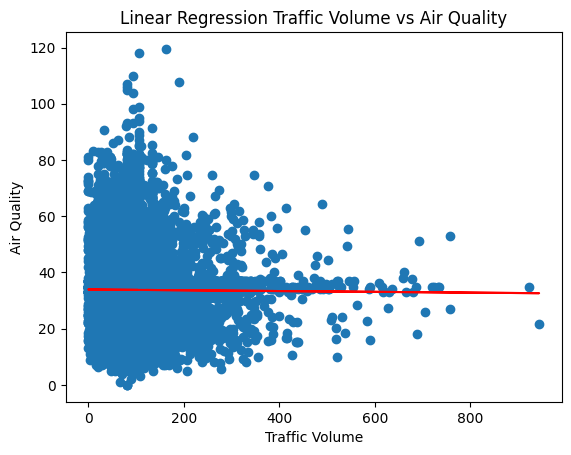

In [93]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 33.946 + -0.0014*X_train, 'r' )
plt.title("Linear Regression Traffic Volume vs Air Quality")
plt.xlabel("Traffic Volume")
plt.ylabel("Air Quality")
plt.show()

In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
linreg.fit(X_train, y_train)
print(linreg.intercept_) #same as above so it works
print(linreg.coef_) #same as above so it works

[33.94607935]
[[-0.0013983]]


In [121]:
X_test = X_test.reshape(-1, 1)
y_pred = linreg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)
MAE = mean_absolute_error(y_test, y_pred)
print(MAE)

186.70587805576008
13.664035935833896
9.669938099671372


In [122]:
linreg.score(X_test, y_test)

-0.0001961631365048344